## FUNCTION UNTUK PREPROCESSING

In [1]:
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [2]:
def casefolding(ulasan):
    ulasan = ulasan.lower()
    return ulasan

In [3]:
import re
import string
def cleaning(Ulasan):
    Ulasan = Ulasan.strip(" ")
    Ulasan = re.sub(r'[?|$|.|!_:")(-+,]', ' ', Ulasan)
    Ulasan = re.sub(r'\d+', ' ', Ulasan)
    Ulasan = re.sub(r"\b[a-zA-Z]\b", " ",Ulasan)
    Ulasan = re.sub('\s+',' ', Ulasan)
    return Ulasan

In [4]:
from nltk.tokenize import word_tokenize
def tokenisasi(text):
    return word_tokenize(text)

In [5]:
normalizad_word = pd.read_excel("normalisasi.xlsx")
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 
def normalisasi(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [6]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Mendefinisikan stopword Bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))
# Fungsi untuk menghapus stopword dari sebuah teks
def hapuskata(Ulasan):
    return [token for token in Ulasan if token not in stop_words]

[nltk_data] Downloading package stopwords to C:\Users\LU'LUATUL
[nltk_data]     MAKNUNAH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\LU'LUATUL
[nltk_data]     MAKNUNAH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def steming(text):
    stemmed_tokens = [stemmer.stem(token) for token in text]
    return ' '.join(stemmed_tokens)

## LOAD DATA

In [8]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [9]:
data_clean=pd.read_csv('PBA.csv', encoding='latin1')
data_clean

,Ulasan,Label
0,rakor surabaya nginap layan ramah kamar bagus ...,positif
1,makan enak ac nya layan fasilitas kamar lengka...,positif
2,layan bagus deal tarik fasilitas kamar mandi n...,positif
3,keren nih malam pop hotel layan ramah cepat fa...,positif
4,lucu kak kali lihat kamar mandi nya portabel h...,positif
...,...,...
395,jadwal maintenen kamar bulan ramai minggu sesu...,negatif
396,kamar mandi nya nya nyaman kunci shower kamar ...,negatif
397,ac nya bocor kamar tv nya channel china ya gan...,negatif
398,oke lampu mati nyala paruh toilet bau pesing g...,negatif


## Menghitung TF-IDF

In [10]:
#MENGHITUNG TF-IDF dengan modul sklearn.feature extraction text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#melihat kemunculan kata
vectorizer = CountVectorizer()
k_kata= vectorizer.fit_transform(data_clean['Ulasan'].astype('U'))
print(k_kata)
#menghitung bobot kata atau tf-idf
tfidf= TfidfVectorizer()
h_tfidf= tfidf.fit_transform(data_clean['Ulasan'].astype('U'))
print('--------------------------BOBOT-------------------------------------------------------')
print(h_tfidf)

  (0, 1027)	1
  (0, 1272)	1
  (0, 860)	1
  (0, 689)	1
  (0, 1029)	1
  (0, 553)	1
  (0, 87)	1
  (0, 1225)	1
  (0, 119)	1
  (0, 879)	1
  (0, 1289)	1
  (0, 1125)	1
  (0, 804)	1
  (0, 974)	1
  (0, 342)	1
  (0, 739)	1
  (0, 702)	1
  (0, 67)	1
  (0, 817)	1
  (0, 773)	1
  (0, 100)	1
  (1, 689)	1
  (1, 553)	1
  (1, 342)	1
  (1, 702)	1
  :	:
  (398, 522)	1
  (398, 505)	1
  (398, 754)	1
  (398, 877)	1
  (398, 929)	1
  (398, 971)	1
  (398, 724)	1
  (398, 169)	1
  (398, 862)	1
  (398, 168)	1
  (399, 689)	1
  (399, 1029)	1
  (399, 553)	2
  (399, 213)	1
  (399, 141)	1
  (399, 97)	2
  (399, 143)	1
  (399, 836)	1
  (399, 1013)	1
  (399, 619)	1
  (399, 381)	1
  (399, 424)	1
  (399, 1066)	1
  (399, 989)	1
  (399, 1054)	1
--------------------------BOBOT-------------------------------------------------------
  (0, 100)	0.1912273174530346
  (0, 773)	0.2732909901964756
  (0, 817)	0.2732909901964756
  (0, 67)	0.1624240137285076
  (0, 702)	0.18830491506740035
  (0, 739)	0.17446321313678606
  (0, 342)	0.129643

In [11]:
import pickle
with open('tfidf.pkl','wb') as f:
    pickle.dump(tfidf,f)

In [12]:
vectorizer.get_feature_names()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abis',
 'ac',
 'acara',
 'access',
 'adelia',
 'administrasi',
 'again',
 'agam',
 'air',
 'aja',
 'ajak',
 'akibat',
 'akses',
 'aktif',
 'aku',
 'ala',
 'alacarte',
 'alam',
 'alami',
 'alarm',
 'alas',
 'alat',
 'alfa',
 'alfaexpress',
 'alfamart',
 'alhamdulillah',
 'alias',
 'alir',
 'aman',
 'amatir',
 'ambil',
 'ambles',
 'amel',
 'amenities',
 'amenitis',
 'amet',
 'amis',
 'ampel',
 'an',
 'anak',
 'andal',
 'andi',
 'aneh',
 'anggar',
 'angin',
 'animal',
 'antar',
 'antimainstream',
 'antri',
 'apa',
 'apat',
 'apek',
 'api',
 'apit',
 'aplikasi',
 'arah',
 'area',
 'asap',
 'asbes',
 'asik',
 'asin',
 'asli',
 'assistent',
 'asyik',
 'at',
 'atap',
 'atas',
 'atm',
 'atmnya',
 'ato',
 'atur',
 'awak',
 'awareness',
 'awat',
 'awesome',
 'ayah',
 'ayam',
 'ayo',
 'bab',
 'baby',
 'back',
 'backpacker',
 'backpacking',
 'backpaker',
 'bad',
 'badly',
 'bagi',
 'bagus',
 'bahan',
 'baik',
 'baju',
 'bal',
 'balas',
 'balik',
 'balsem',
 'bandara',
 'banding',
 'banget',
 'ba

In [13]:
df = pd.DataFrame(k_kata.todense().T,
                 index = vectorizer.get_feature_names(),
                 columns=[f'D{i+1}' for i in range (len(data_clean))])
df

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D391,D392,D393,D394,D395,D396,D397,D398,D399,D400
abis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ac,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
acara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adelia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yani,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
you,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
your,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TUNING PARAMETER

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Menentukan split data
test_sizes = [0.2, 0.3, 0.4]
# menentukan nilai K
nK_values = [1,2,3,4,5,6,7,8,9,10]
# perulangan test size dan nilai k
for test_size in test_sizes:
    for nK in nK_values:
        # SPLIT DATA (DATA UJI & LATIH)
        X_train, X_test, y_train, y_test = train_test_split(h_tfidf, data_clean['Label'], test_size=test_size, random_state=42)
        # Klasifikasi knn dengan nilai k
        knn = KNeighborsClassifier(n_neighbors=nK)
        # latih klasifikasi
        knn.fit(X_train, y_train)
        # melakukan prediksi pada data uji
        y_pred = knn.predict(X_test)
        #menghitung akurasi
        accuracy = accuracy_score(y_test, y_pred)
        # Cetak hasil
        print(f"Test Size: {test_size}, NILAI K: {nK}, Accuracy: {accuracy}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Test Size: 0.2, NILAI K: 1, Accuracy: 0.7625
Test Size: 0.2, NILAI K: 2, Accuracy: 0.75
Test Size: 0.2, NILAI K: 3, Accuracy: 0.825
Test Size: 0.2, NILAI K: 4, Accuracy: 0.85
Test Size: 0.2, NILAI K: 5, Accuracy: 0.8625
Test Size: 0.2, NILAI K: 6, Accuracy: 0.825
Test Size: 0.2, NILAI K: 7, Accuracy: 0.85
Test Size: 0.2, NILAI K: 8, Accuracy: 0.85
Test Size: 0.2, NILAI K: 9, Accuracy: 0.85
Test Size: 0.2, NILAI K: 10, Accuracy: 0.825
Test Size: 0.3, NILAI K: 1, Accuracy: 0.7166666666666667
Test Size: 0.3, NILAI K: 2, Accuracy: 0.75
Test Size: 0.3, NILAI K: 3, Accuracy: 0.825
Test Size: 0.3, NILAI K: 4, Accuracy: 0.825
Test Size: 0.3, NILAI K: 5, Accuracy: 0.85
Test Size: 0.3, NILAI K: 6, Accuracy: 0.8166666666666667
Test Size: 0.3, NILAI K: 7, Accuracy: 0.8166666666666667
Test Size: 0.3, NILAI K: 8, Accuracy: 0.8
Test Size: 0.3, NILAI K: 9, Accuracy: 0.7833333333333333
Test Size: 0.3, NILAI K: 10, Accuracy: 0.8
Test Size: 0.4, NILAI K: 1, Accuracy: 0.71875
Test Size: 0.4, NILAI K: 2, A

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## SPLIT DATA

In [15]:
#Pembagian data
import collections, numpy
from sklearn.model_selection import train_test_split
#pembagian data X dan Y dengan data training 20%
X_train, X_test, y_train, y_test = train_test_split(h_tfidf, data_clean['Label'], test_size=0.2, random_state=42)
#Melihat jumlah pembagian data
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)
# JUMLAH DATA UJI NEGATIF DAN POSITIF
pos = (y_test == 'positif').sum()
neg = (y_test == 'negatif').sum()
#JUMLAH DATA LATIH NEGATIF DAN POSITIF
postrain = (y_train == 'positif').sum()
negtrain = (y_train == 'negatif').sum()
total = pos + neg
# MENCETAK JUMLAH DATA UJI NEGATIF DAN POSITIF, JUMLAH DATA LATIH NEGATIF DAN POSITIF
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
#melihat banyak nya keseluruhan data positif & negatif pada data label
data_clean['Label'].value_counts()

Jumlah Data Uji: (80, 1461)
Jumlah Data Latih: (320, 1461)
Jumlah data uji dengan sentimen positif: 44
Jumlah data uji dengan sentimen negatif: 36
Jumlah data latih dengan sentimen positif: 156
Jumlah data latih dengan sentimen negatif: 164


positif    200
negatif    200
Name: Label, dtype: int64

## HASIL AKURASI DAN PREDIKSI KNN

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="positif"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="positif"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="positif"))
print("error_rate:", 1-accuracy_score(y_test,predicted))

confusion matrix:
 [[26 10]
 [ 1 43]]

TN: 26
FP: 10
FN: 1
TP: 43
              precision    recall  f1-score   support

     negatif       0.96      0.72      0.83        36
     positif       0.81      0.98      0.89        44

    accuracy                           0.86        80
   macro avg       0.89      0.85      0.86        80
weighted avg       0.88      0.86      0.86        80


Hasil Klasifikasi Sentimen Analisis:
Accuracy: 0.8625
Precision: 0.8113207547169812
Recall: 0.9772727272727273
f1_score: 0.88659793814433
error_rate: 0.13749999999999996


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


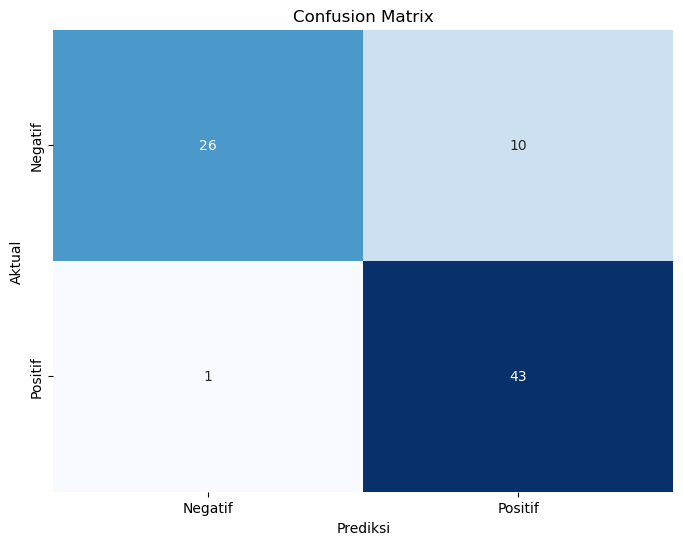

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks kebingungan
cm = confusion_matrix(y_test, predicted)

# Membuat diagram plot untuk matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Menambahkan label pada sumbu x dan y
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

# Menyertakan kelas pada sumbu x dan y
tick_labels = ['Negatif', 'Positif']
plt.xticks(ticks=[0.5, 1.5], labels=tick_labels)
plt.yticks(ticks=[0.5, 1.5], labels=tick_labels)

# Menyertakan judul pada diagram plot
plt.title("Confusion Matrix")

# Menampilkan diagram plot
plt.show()


In [18]:
dfu =pd.DataFrame({'Label':y_test, 'prediksi':predicted})
dfu.head(80)

,Label,prediksi
209,negatif,positif
280,negatif,negatif
33,positif,positif
210,negatif,positif
93,positif,positif
...,...,...
246,negatif,negatif
227,negatif,negatif
369,negatif,negatif
176,positif,positif


## MENYIMPAN MODEL

In [19]:
import pickle
with open('KNN.pkl','wb') as f:
    pickle.dump(clf,f)

## IMPLEMENTASI MODEL YANG TELAH DI BUAT

In [20]:
import pickle
with open('KNN.pkl', 'rb') as f:
    clfuji = pickle.load(f)
print(clfuji)

KNeighborsClassifier()


## PENGUJIAN MODEL DENGAN DATA BARU

In [21]:
duji=pd.read_csv('knnuji.csv')
duji

,Ulasan
0,Memuaskan pelayanannya. Patut direkomendasikan...
1,Staycation deket deket an aja di gubeng karena...
2,"se nyaman itu kamarnya, walaupun sempit ac nya..."
3,kunjungan pertama kesini di kamar 932 deket sa...
4,"Hotel yang menyenangkan bagi penginapnya, coco..."
...,...
395,Berkunjung ke Surabaya 1 hari untuk keperluan ...
396,Cukup bagus hotelnya nyaman. Hotel budget di j...
397,Proses check in dan check out sangat cepat dan...
398,Hotel yang nyaman dan cozy Pelayanan yg ramah...


## PRE PROCESSING DATA UJI BARU

In [22]:
duji['Ulasan']=duji['Ulasan'].apply(casefolding)
duji

,Ulasan
0,memuaskan pelayanannya. patut direkomendasikan...
1,staycation deket deket an aja di gubeng karena...
2,"se nyaman itu kamarnya, walaupun sempit ac nya..."
3,kunjungan pertama kesini di kamar 932 deket sa...
4,"hotel yang menyenangkan bagi penginapnya, coco..."
...,...
395,berkunjung ke surabaya 1 hari untuk keperluan ...
396,cukup bagus hotelnya nyaman. hotel budget di j...
397,proses check in dan check out sangat cepat dan...
398,hotel yang nyaman dan cozy pelayanan yg ramah...


In [23]:
duji['Ulasan']=duji['Ulasan'].apply(cleaning)
duji

,Ulasan
0,memuaskan pelayanannya patut direkomendasikan ...
1,staycation deket deket an aja di gubeng karena...
2,se nyaman itu kamarnya walaupun sempit ac nya ...
3,kunjungan pertama kesini di kamar deket sama l...
4,hotel yang menyenangkan bagi penginapnya cocok...
...,...
395,berkunjung ke surabaya hari untuk keperluan bi...
396,cukup bagus hotelnya nyaman hotel budget di ja...
397,proses check in dan check out sangat cepat dan...
398,hotel yang nyaman dan cozy pelayanan yg ramah ...


In [24]:
duji['Ulasan']=duji['Ulasan'].apply(tokenisasi)
duji

,Ulasan
0,"[memuaskan, pelayanannya, patut, direkomendasi..."
1,"[staycation, deket, deket, an, aja, di, gubeng..."
2,"[se, nyaman, itu, kamarnya, walaupun, sempit, ..."
3,"[kunjungan, pertama, kesini, di, kamar, deket,..."
4,"[hotel, yang, menyenangkan, bagi, penginapnya,..."
...,...
395,"[berkunjung, ke, surabaya, hari, untuk, keperl..."
396,"[cukup, bagus, hotelnya, nyaman, hotel, budget..."
397,"[proses, check, in, dan, check, out, sangat, c..."
398,"[hotel, yang, nyaman, dan, cozy, pelayanan, yg..."


In [25]:
duji['Ulasan']=duji['Ulasan'].apply(normalisasi)
duji

,Ulasan
0,"[memuaskan, pelayanannya, patut, direkomendasi..."
1,"[staycation, deket, deket, an, aja, di, gubeng..."
2,"[se, nyaman, itu, kamarnya, walaupun, sempit, ..."
3,"[kunjungan, pertama, kesini, di, kamar, deket,..."
4,"[hotel, yang, menyenangkan, bagi, penginapnya,..."
...,...
395,"[berkunjung, ke, surabaya, hari, untuk, keperl..."
396,"[cukup, bagus, hotelnya, nyaman, hotel, anggar..."
397,"[proses, check, in, dan, check, out, sangat, c..."
398,"[hotel, yang, nyaman, dan, nyaman, pelayanan, ..."


In [26]:
duji['Ulasan']=duji['Ulasan'].apply(hapuskata)
duji

,Ulasan
0,"[memuaskan, pelayanannya, patut, direkomendasi..."
1,"[staycation, deket, deket, an, aja, gubeng, we..."
2,"[nyaman, kamarnya, sempit, ac, nya, panas, wor..."
3,"[kunjungan, kesini, kamar, deket, lift, depann..."
4,"[hotel, menyenangkan, penginapnya, cocok, back..."
...,...
395,"[berkunjung, surabaya, keperluan, bisnis, menc..."
396,"[bagus, hotelnya, nyaman, hotel, anggaran, jan..."
397,"[proses, check, in, check, out, cepat, mudah, ..."
398,"[hotel, nyaman, nyaman, pelayanan, ramah, mura..."


In [27]:
duji['Ulasan']=duji['Ulasan'].apply(steming)
duji

,Ulasan
0,muas layan patut rekomendasi bagus keluarga ac...
1,staycation deket deket an aja gubeng weekend m...
2,nyaman kamar sempit ac nya panas worth it pand...
3,kunjung kesini kamar deket lift depan pas harg...
4,hotel senang inap cocok backpaker harga jangka...
...,...
395,kunjung surabaya perlu bisnis coba inap hotel ...
396,bagus hotel nyaman hotel anggar jantung kota s...
397,proses check in check out cepat mudah tunjang ...
398,hotel nyaman nyaman layan ramah murah senyum h...


## MENGHITUNG TF IDF DARI DATA UJI

In [28]:
import pickle
with open('tfidf.pkl', 'rb') as f:
    vectoriz= pickle.load(f)

In [29]:
hasiltfidf=vectoriz.transform(duji['Ulasan'])
hasiltfidf

<400x1461 sparse matrix of type '<class 'numpy.float64'>'
	with 6842 stored elements in Compressed Sparse Row format>

## PREDIKSI MENGGUNAKAN MODEL PADA DATA UJI BARU

In [30]:
prediksi=clfuji.predict(hasiltfidf)
prediksi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['positif', 'positif', 'negatif', 'positif', 'positif', 'positif',
       'negatif', 'negatif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'negatif',
       'positif', 'positif', 'positif', 'positif', 'negatif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'negatif', 'positif',
       'positif', 'negatif', 'positif', 'negatif', 'positif', 'negatif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'negatif', 'positif', 'positif',
       'negatif', 'positif', 'positif', 'negatif', 'positif', 'negatif',
       'negatif', 'positif', 'positif', 'positif', 'positif', 'negatif',
       'negatif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'negatif', 'positif', 'negatif', 'positif',
       'positif', 'negatif', 'negatif', 'negatif', 

In [31]:
#Mengubah data uji kedalam data frame lagi
dfuji=pd.DataFrame(duji['Ulasan'])
dfuji

,Ulasan
0,muas layan patut rekomendasi bagus keluarga ac...
1,staycation deket deket an aja gubeng weekend m...
2,nyaman kamar sempit ac nya panas worth it pand...
3,kunjung kesini kamar deket lift depan pas harg...
4,hotel senang inap cocok backpaker harga jangka...
...,...
395,kunjung surabaya perlu bisnis coba inap hotel ...
396,bagus hotel nyaman hotel anggar jantung kota s...
397,proses check in check out cepat mudah tunjang ...
398,hotel nyaman nyaman layan ramah murah senyum h...


In [32]:
dfuji['Label']=prediksi
dfuji

,Ulasan,Label
0,muas layan patut rekomendasi bagus keluarga ac...,positif
1,staycation deket deket an aja gubeng weekend m...,positif
2,nyaman kamar sempit ac nya panas worth it pand...,negatif
3,kunjung kesini kamar deket lift depan pas harg...,positif
4,hotel senang inap cocok backpaker harga jangka...,positif
...,...,...
395,kunjung surabaya perlu bisnis coba inap hotel ...,positif
396,bagus hotel nyaman hotel anggar jantung kota s...,negatif
397,proses check in check out cepat mudah tunjang ...,negatif
398,hotel nyaman nyaman layan ramah murah senyum h...,positif


In [33]:
# Menghitung jumlah hasil prediksi positif
jumlah_positif = sum(x =='positif' for x in dfuji['Label'])
# Menampilkan hasil
print("Jumlah hasil prediksi positif:", jumlah_positif)

Jumlah hasil prediksi positif: 293


In [34]:
# Menghitung jumlah hasil prediksi negatif
jumlah_negatif = sum(x =='negatif' for x in dfuji['Label'])
# Menampilkan hasil
print("Jumlah hasil prediksi negatif:", jumlah_negatif)

Jumlah hasil prediksi negatif: 107


## Menyimpan hasil prediksi ke dalam file excel

In [35]:
dfuji.to_excel('prediksiknnuji.xlsx')